<a href="https://colab.research.google.com/github/Ehimmell/AIImageRecognition/blob/main/TF_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!wget https://bitbucket.org/imagesforapp/imagestryagain/raw/61bdc67a317072bd21b7c5a0561ce35422550b12/RockPaperScissorsImages.zip

--2024-03-30 23:58:04--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  24.7MB/s    in 5.1s    

2024-03-30 23:58:11 (19.8 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [112]:
!unzip RockPaperScissorsImages.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/scissors/AOao5nWv96N9SV7O.png  
  inflating: test/scissors/AoGoNngxM4z3CboT.png  
  inflating: test/scissors/AORIZvib6x3RaA82.png  
  inflating: test/scissors/AqKsjUyFEqJcD0HC.png  
  inflating: test/scissors/AqQ5Xll9nVqJODji.png  
  inflating: test/scissors/aRca3k5D1oCHVx0h.png  
  inflating: test/scissors/ASH8lCQK8VGgkfyG.png  
  inflating: test/scissors/asi6ZQCskd51eHm1.png  
  inflating: test/scissors/At8YmfH681yAI9O6.png  
  inflating: test/scissors/b4Qm4ZK5AAUQo1Ax.png  
  inflating: test/scissors/b6laDVaqf5K3aQvH.png  
  inflating: test/scissors/B9HRznSZlfXYAUwK.png  
  inflating: test/scissors/bAQiTy59XVNlKqc4.png  
  inflating: test/scissors/Bd18RfxcJr6O5n6j.png  
  inflating: test/scissors/BdMHRwUTJ4FI4uPr.png  
  inflating: test/scissors/bI7SDSU3g7fZsxRM.png  
  inflating: test/scissors/BJwCAwQV0EWaUT1X.png  
  inflating: test/scissors/bLJSE1dl7VbQCUF9.png  
  inflating: test/scissors/bmlw6acW9500qauw.png  

In [262]:
image_height, image_width = 32, 32
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory (
    "train",
    image_size = (image_height, image_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory (
    "test",
    image_size = (image_height, image_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory (
    "validation",
    image_size = (image_height, image_width),
    batch_size = batch_size
)


Found 2188 files belonging to 3 classes.
Found 2188 files belonging to 3 classes.
Found 2188 files belonging to 3 classes.


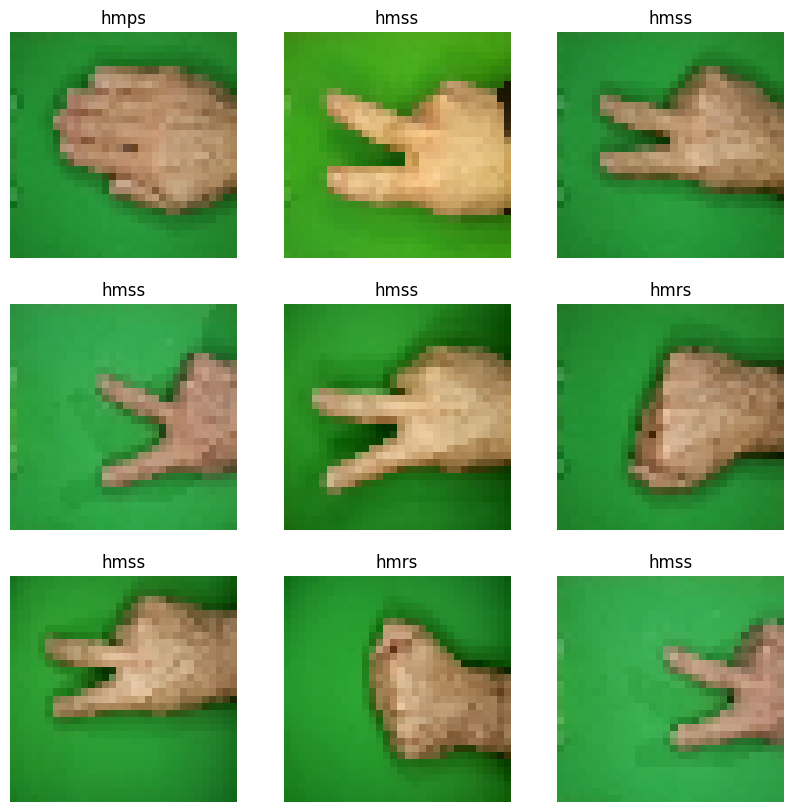

In [269]:
class_names = ["hmps", "hmrs", "hmss"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [274]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3),
     tf.keras.layers.InputLayer(input_shape =(32, 32))
    ])

In [275]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)
print(type(val_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [276]:

model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
69/69 [==============================] - 14s 177ms/step - loss: 0.6576 - accuracy: 0.7390 - val_loss: 0.2479 - val_accuracy: 0.9223
Epoch 2/10
69/69 [==============================] - 11s 155ms/step - loss: 0.1701 - accuracy: 0.9410 - val_loss: 0.1168 - val_accuracy: 0.9657
Epoch 3/10
69/69 [==============================] - 11s 156ms/step - loss: 0.0975 - accuracy: 0.9698 - val_loss: 0.0699 - val_accuracy: 0.9817
Epoch 4/10
69/69 [==============================] - 10s 131ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0475 - val_accuracy: 0.9867
Epoch 5/10
69/69 [==============================] - 13s 177ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0332 - val_accuracy: 0.9927
Epoch 6/10
69/69 [==============================] - 11s 161ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0297 - val_accuracy: 0.9945
Epoch 7/10
69/69 [==============================] - 16s 223ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0239 - val_accuracy: 0.9931

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_22 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_66 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_67 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_68 (Conv2D)          (None, 4, 4, 32)        

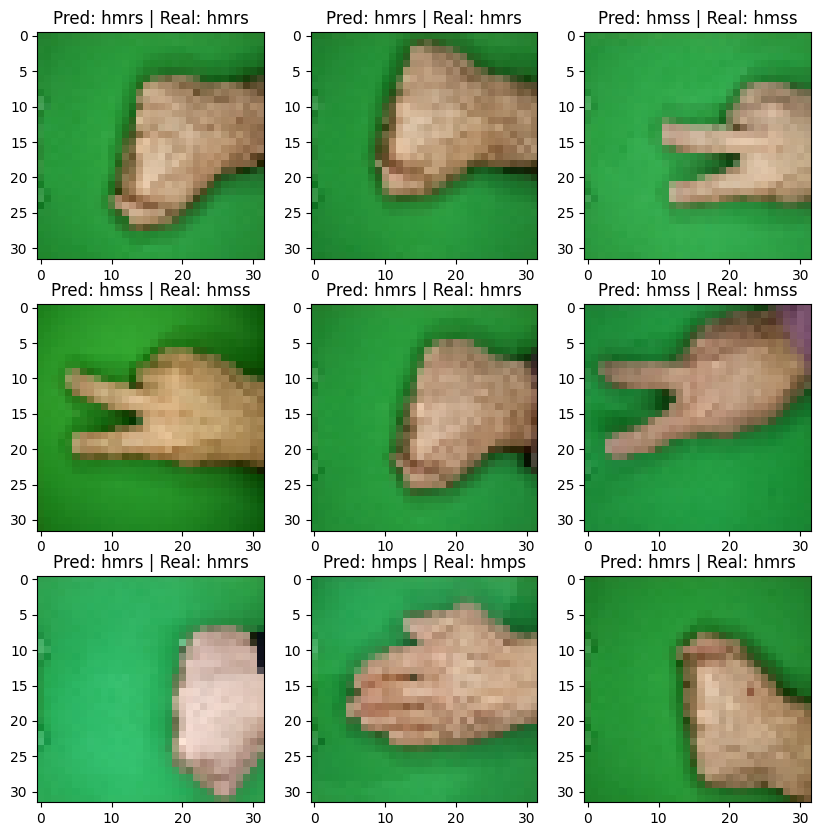

In [277]:

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import img_to_array

desired_shape = (32, 32)
model.summary()
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  if images.shape[0] % desired_shape[1] != 0:
    images = tf.reshape(images, desired_shape)
    images = tf.image.resize(images, size = (32, 32))
    images = img_to_array(images)
    images = tf.expand_dims(images, axis = 0)
    images = tf.cast(images, tf.float32) / 255.0
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = tf.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


In [279]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)